In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import time
import seaborn as sns

In [21]:
data = pd.read_csv('seeds.csv')
data

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [22]:
datanus = data.drop(['Class'], axis=1)
scaler = preprocessing.MinMaxScaler()
datanus = pd.DataFrame(scaler.fit_transform(datanus), columns = datanus.columns)
datanus

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


In [23]:
models = []
score1 = []
score2 = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(datanus)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(datanus, model.labels_))

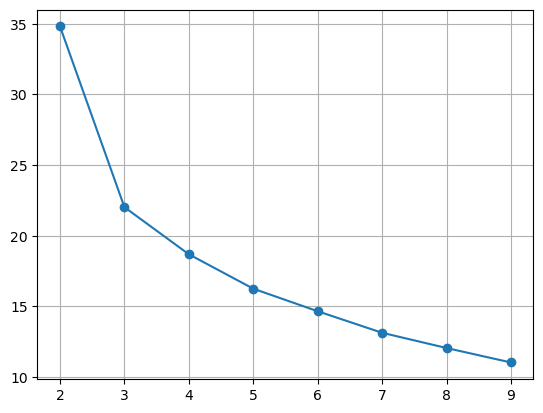

In [24]:
plt.grid()
plt.plot(np.arange(2,10), score1, marker = 'o')
plt.show()

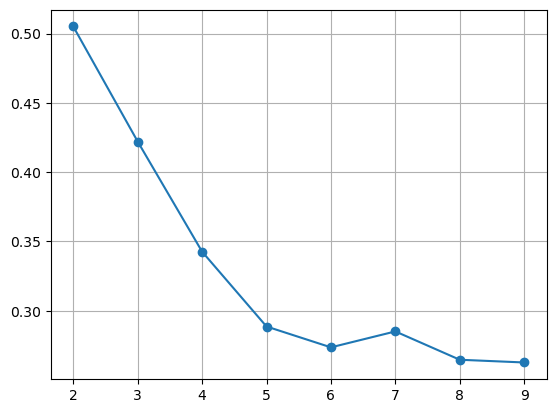

In [25]:
plt.grid()
plt.plot(np.arange(2,10), score2, marker = 'o')
plt.show()

In [72]:
timer = time.time()
model1 = KMeans(n_clusters=6, random_state=123, init='k-means++')
model1.fit(datanus)
print(" %s seconds" % (time.time() - timer))
model1.cluster_centers_

 0.01994943618774414 seconds


array([[ 8.08408089e-01,  8.38670799e-01,  7.16783878e-01,
         7.71314283e-01,  8.14638275e-01,  3.50455300e-01,
         7.91851305e-01, -4.44089210e-16],
       [ 5.63194596e-01,  6.19040051e-01,  6.17129694e-01,
         5.71487353e-01,  5.98662207e-01,  4.11572318e-01,
         6.12468280e-01,  4.00000000e+00],
       [ 1.62173688e-01,  1.95014663e-01,  5.27135414e-01,
         1.79998547e-01,  2.46384476e-01,  5.97232423e-01,
         2.69341338e-01,  2.00000000e+00],
       [ 2.47371734e-01,  2.66597796e-01,  6.82274652e-01,
         2.04222973e-01,  3.58042290e-01,  2.37675261e-01,
         1.62366650e-01,  5.00000000e+00],
       [ 4.10214038e-01,  4.53225436e-01,  6.49500907e-01,
         4.05280280e-01,  4.84814287e-01,  2.19272488e-01,
         3.40376935e-01,  1.00000000e+00],
       [ 9.65109804e-02,  1.67779191e-01,  2.36376751e-01,
         2.07279395e-01,  9.20189338e-02,  4.89279872e-01,
         3.21036751e-01,  3.00000000e+00]])

In [73]:
labels = model1.labels_
datanus['Claster'] = labels

In [74]:
datanus['Claster'].value_counts()

0    48
5    39
4    36
2    31
3    30
1    26
Name: Claster, dtype: int64

In [75]:
fig = go.Figure(data=[go.Scatter3d(x=datanus['KernelLength'], y=datanus['AsymCoeff'],
                                  z=datanus['KernelWidth'], mode='markers',
                                   marker_color=datanus['Claster'], marker_size=4)])
fig.show()

In [76]:
timer = time.time()
model2 = AgglomerativeClustering(6, compute_distances=True)
clustering = model2.fit(data)
print(" %s seconds" % (time.time() - timer))

 0.003040313720703125 seconds


In [77]:
fig = go.Figure(data=[go.Scatter3d(x=datanus['KernelLength'], y=datanus['AsymCoeff'],
                                  z=datanus['KernelWidth'], mode='markers',
                                   marker_color=clustering.labels_, marker_size=5)])
fig.show()

In [78]:
timer = time.time()
model3 = DBSCAN(eps=0.35, min_samples=5).fit(datanus)
kek =  (time.time() - timer)
kek

0.002505064010620117

In [79]:
fig = go.Figure(data=[go.Scatter3d(x=datanus['KernelLength'], y=datanus['AsymCoeff'],
                                  z=datanus['KernelWidth'], mode='markers',
                                   marker_color=model3.labels_, marker_size=5)])
fig.show()